# UAVid Drone Dataset


UAVid Dataset
The The UAVid dataset is an UAV video dataset for semantic segmentation task focusing on urban scenes. It has several features:

Semantic segmentation 4K resolution UAV videos 8 object categories Street scene context.

The segmentation categories need to be converted to the format of the Semantic Drone Dataset, as seen below

## Semantic Annotation

The images are labeled densely using polygons and contain the following 24 classes: 
  - unlabeled
  - paved-area
  - dirt
  - grass
  - gravel
  - water
  - rocks
  - pool
  - vegetation
  - roof
  - wall
  - window
  - door
  - fence
  - fence-pole
  - person
  - dog
  - car
  - bicycle
  - tree
  - bald-tree
  - ar-marker
  - obstacle
  - conflicting

In [ ]:
#run if using google colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# drive_root = "G:/MyDrive/3DV/drone-images-semantic-segmentation/" #if running on google colab
drive_root = "." #if running locally

In [ ]:
cd /content/drive/MyDrive/3DV/drone-images-semantic-segmentation/ #confirm in correct location on colab

In [3]:
import cv2
import random
import albumentations as A
from matplotlib import pyplot as plt
import numpy as np
import os

# Data Augmentation using Albumentations Library

Perfromed as described in README.md

# Data Preparation
Slow, rather download from shared drive than recreate locally

In [ ]:
transform = A.Compose([
    A.RandomCrop(width=2400, height=1600, p=1.0),
    A.HorizontalFlip(p=1.0),
    A.VerticalFlip(p=1.0),
    A.Rotate(limit=[60, 240], p=1.0, interpolation=cv2.INTER_NEAREST),
    A.RandomBrightnessContrast(brightness_limit=[-0.2, 0.4], contrast_limit=0.2, p=1.0),
    A.OneOf([
        A.CLAHE (clip_limit=2.0, tile_grid_size=(8, 8), p=0.5),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=1, shift_limit=0.5, interpolation=cv2.INTER_NEAREST, p=0.5),
    ], p=1.0),
], p=1.0)

In [ ]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 16

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(16, 16), squeeze=True)
        f.set_tight_layout(h_pad=5, w_pad=5)

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16), squeeze=True)
        plt.tight_layout(pad=0.2, w_pad=1.0, h_pad=0.01)

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original Image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original Mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed Image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed Mask', fontsize=fontsize)
        
    plt.savefig('sample_augmented_image.png', facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 100)

In [ ]:
drive_root + "uavid_v1.5_official_release_image/train/seq1/Images/000000.png"

In [ ]:
image = cv2.imread("./" + "uavid_v1.5_official_release_image/train/seq1/Images/000000.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread("./" + "uavid_v1.5_official_release_image/train/seq1/Labels_SDD/000000.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB
                   )

transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

cv2.imwrite('./image.png',cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
cv2.imwrite('./mask.png',cv2.cvtColor(transformed_mask, cv2.COLOR_BGR2RGB))

visualize(transformed_image, transformed_mask, image, mask)

In [ ]:
pwd

In [ ]:
### Collate all Images from UAVid Dataset
import os
import shutil

root_dir = './uavid_v1.5_official_release_image/train'  # Set this to the path of your root directory containing the 'seq' folders

count = 0
for seq_dir in os.listdir(root_dir):
    if not os.path.isdir(os.path.join(root_dir, seq_dir)):
        continue

    images_dir = os.path.join(root_dir, seq_dir, 'Images')
    labels_sdd_dir = os.path.join(root_dir, seq_dir, 'Labels_SDD')

    # Create output directories
    images_out_dir = os.path.join(root_dir, 'All_Images')
    labels_sdd_out_dir = os.path.join(root_dir, 'All_Labels_SDD')
    os.makedirs(images_out_dir, exist_ok=True)
    os.makedirs(labels_sdd_out_dir, exist_ok=True)

    # Copy all images and labels to output directories
    for file in os.listdir(images_dir):
        shutil.copy(os.path.join(images_dir, file), os.path.join(images_out_dir, '{:03d}.png'.format(count)))
        shutil.copy(os.path.join(labels_sdd_dir, file), os.path.join(labels_sdd_out_dir, '{:03d}.png'.format(count)))
        count += 1

## Saving Augmented Images to Disk


In [ ]:
!mkdir aug_images
!mkdir aug_masks

In [ ]:
pwd

In [ ]:
!mkdir processed_dataset/train_images/
!mkdir processed_dataset/train_masks/

In [ ]:
!mkdir processed_dataset/train_images/train
!mkdir processed_dataset/train_masks/train

In [ ]:
# !mkdir augmented-uavid-dataset\\train_images
!mkdir augmented-uavid-dataset\\train_masks

!mkdir augmented-uavid-dataset\\train_images\\train
!mkdir augmented-uavid-dataset\\train_masks\\train

In [ ]:
images_dir = r'.\uavid_v1.5_official_release_image\train\All_Images/'
masks_dir = r'.\uavid_v1.5_official_release_image\train\All_Labels_SDD/'

In [ ]:
pwd

In [ ]:
file_names = np.sort(os.listdir(images_dir)) 
file_names = np.char.split(file_names, '.')
filenames = np.array([])
for i in range(len(file_names)):
    filenames = np.append(filenames, file_names[i][0])

In [ ]:

def augment_dataset(count):
    '''Function for data augmentation
        Input:
            count - total no. of images after augmentation = initial no. of images * count
        Output:
            writes augmented images (input images & segmentation masks) to the working directory
    '''
    i = 0
    for i in range(count):
        for file in filenames:
            #3 dec places file name format
            file = '{:03d}'.format(int(file))
            img = cv2.imread(images_dir+file+'.png')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            mask = cv2.imread(masks_dir+file+'.png')
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            transformed = transform(image=img, mask=mask)
            transformed_image = transformed['image']
            transformed_mask = transformed['mask']

            cv2.imwrite('./augmented-uavid-dataset/train_images/train/aug_{}_'.format(str(i+1))+file+'.png',cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
            cv2.imwrite('./augmented-uavid-dataset/train_masks/train/aug_{}_'.format(str(i+1))+file+'.png',cv2.cvtColor(transformed_mask, cv2.COLOR_BGR2RGB))



In [ ]:
augment_dataset(4)

In [ ]:
!zip -r aug_images.zip './aug_images/'
!zip -r aug_masks.zip './aug_masks/'

In [ ]:
!rm -rf './aug_images/'
!rm -rf './aug_masks/'

# Working with Augmented Dataset

In [4]:
import keract

In [5]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import SVG
import matplotlib.pyplot as plt
%matplotlib inline
import os, re, sys, random, shutil, cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications, optimizers
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger, LearningRateScheduler, TensorBoard
from tensorflow.keras.layers import Input, Lambda, Activation, Conv2D, MaxPooling2D, BatchNormalization, Add, concatenate, Conv2DTranspose

In [6]:
dataset = 'uavid' # 'uavid' or 'semantic_drone_dataset'
train_images = drive_root + f'/augmented-{dataset}-dataset/train_images/'
train_masks = drive_root + f'/augmented-{dataset}-dataset/train_masks/'
val_images = drive_root + f'/augmented-{dataset}-dataset/val_images/'
val_masks = drive_root + f'/augmented-{dataset}-dataset/val_masks/'

## Optional Vizualization of Augmented Images

In [ ]:
file_names = np.sort(os.listdir(train_images + 'train/')) 
file_names = np.char.split(file_names, '.')
filenames = np.array([])
for i in range(len(file_names[:5])):
    filenames = np.append(filenames, file_names[i][0])

In [ ]:
def show_data(files, original_images_dir, label_images_dir):

    for file in files:
        fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)

        axs[0].imshow(Image.open(original_images_dir+'train/'+str(file)+'.jpg'))
        axs[0].set_title('Original Image', fontdict = {'fontsize':20})
        axs[0].set_xticks(np.arange(0, 6500, 1000))
        axs[0].set_yticks(np.arange(0, 4500, 1000))
        axs[0].grid(False)
        axs[0].axis(True)

        semantic_label_image = Image.open(label_images_dir+ 'train/'+str(file)+'.png')
        semantic_label_image = np.asarray(semantic_label_image)
        axs[1].imshow(semantic_label_image)
        axs[1].set_title('Semantic Segmentation Mask', fontdict = {'fontsize':20})
        axs[1].set_xticks(np.arange(0, 6500, 1000))
        axs[1].set_yticks(np.arange(0, 4500, 1000))
        axs[1].grid(False)
        axs[1].axis(True)

        plt.savefig('image_'+file, facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 100)
        plt.show()
    
show_data(filenames[:5], train_images, train_masks)    

In [ ]:
augmented_files = ['092','118', '228', '277', '376']

def show_augmented_images(files, original_images_dir):
    for file in files:
        fig, axs = plt.subplots(1, 5, figsize=(30, 6), constrained_layout=True)
        for i in range(5):
            if i == 0:
                axs[i].imshow(Image.open(original_images_dir+'train/'+str(file)+'.jpg'))
                axs[i].set_title('Original Image: {}.jpg'.format(file), fontdict = {'fontsize':20})
                axs[i].set_xticks(np.arange(0, 6500, 1000))
                axs[i].set_yticks(np.arange(0, 4500, 1000))
                axs[i].grid(False)
                axs[i].axis(True)
            else:
                axs[i].imshow(Image.open(original_images_dir+'train/aug_'+str(i)+'_'+str(file)+'.jpg'))
                axs[i].set_title('Augmented Image: aug_'+str(i)+'_'+str(file)+'.jpg', fontdict = {'fontsize':20})
                axs[i].set_xticks(np.arange(0, 4500, 1000))
                axs[i].set_yticks(np.arange(0, 3001, 1000))
                axs[i].grid(False)
                axs[i].axis(True)

        plt.savefig('aug_image_'+file, facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 100)
        plt.show()
    
def show_augmented_masks(files, label_images_dir):
    for file in files:
        fig, axs = plt.subplots(1, 5, figsize=(30, 6), constrained_layout=True)
        for i in range(5):
            if i == 0:
                axs[i].imshow(Image.open(label_images_dir+'train/'+str(file)+'.png'))
                axs[i].set_title('Original Mask: {}.png'.format(file), fontdict = {'fontsize':20})
                axs[i].set_xticks(np.arange(0, 6500, 1000))
                axs[i].set_yticks(np.arange(0, 4500, 1000))
                axs[i].grid(False)
                axs[i].axis(True)
            else:
                axs[i].imshow(Image.open(label_images_dir+'train/aug_'+str(i)+'_'+str(file)+'.png'))
                axs[i].set_title('Augmented Mask: aug_'+str(i)+'_'+str(file)+'.png', fontdict = {'fontsize':20})
                axs[i].set_xticks(np.arange(0, 4500, 1000))
                axs[i].set_yticks(np.arange(0, 3001, 1000))
                axs[i].grid(False)
                axs[i].axis(True)

        plt.savefig('aug_mask_'+file, facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 100)
        plt.show()

In [ ]:
show_augmented_images(augmented_files, train_images)
show_augmented_masks(augmented_files, train_masks)

## Labels for Augmented Images

In [7]:
class_dict_df = pd.read_csv(drive_root + '/augmented-semantic-drone-dataset/class_dict.csv', index_col=False, skipinitialspace=True)
# class_dict_df

In [8]:
label_names= list(class_dict_df.name)
label_codes = []
r= np.asarray(class_dict_df.r)
g= np.asarray(class_dict_df.g)
b= np.asarray(class_dict_df.b)

for i in range(len(class_dict_df)):
    label_codes.append(tuple([r[i], g[i], b[i]]))
    
label_codes[:5], label_names[:5]

([(0, 0, 0), (128, 64, 128), (130, 76, 0), (0, 102, 0), (112, 103, 87)],
 ['unlabeled', 'paved-area', 'dirt', 'grass', 'gravel'])

## Create Useful Label & Code Conversion Dictionaries
These will be used for:

* One hot encoding the mask labels for model training
* Decoding the predicted labels for interpretation and visualization 

In [9]:
code2id = {v:k for k,v in enumerate(label_codes)}
id2code = {k:v for k,v in enumerate(label_codes)}

name2id = {v:k for k,v in enumerate(label_names)}
id2name = {k:v for k,v in enumerate(label_names)}

## Define Functions for One Hot Encoding RGB Labels & Decoding Encoded Predictions


In [10]:
def rgb_to_onehot(rgb_image, colormap = id2code):
    '''Function to one hot encode RGB mask labels
        Inputs: 
            rgb_image - image matrix (eg. 256 x 256 x 3 dimension numpy ndarray)
            colormap - dictionary of color to label id
        Output: One hot encoded image of dimensions (height x width x num_classes) where num_classes = len(colormap)
    '''
    num_classes = len(colormap)
    shape = rgb_image.shape[:2]+(num_classes,)
    encoded_image = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(colormap):
        encoded_image[:,:,i] = np.all(rgb_image.reshape( (-1,3) ) == colormap[i], axis=1).reshape(shape[:2])
    return encoded_image


def onehot_to_rgb(onehot, colormap = id2code):
    '''Function to decode encoded mask labels
        Inputs: 
            onehot - one hot encoded image matrix (height x width x num_classes)
            colormap - dictionary of color to label id
        Output: Decoded RGB image (height x width x 3) 
    '''
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in colormap.keys():
        output[single_layer==k] = colormap[k]
    return np.uint8(output)

# Creating Custom Image Data Generators
## Defining Data Generators


In [11]:
# Normalizing only frame images, since masks contain label info
data_gen_args = dict(rescale=1./255)
mask_gen_args = dict()

train_frames_datagen = ImageDataGenerator(**data_gen_args)
train_masks_datagen = ImageDataGenerator(**mask_gen_args)
val_frames_datagen = ImageDataGenerator(**data_gen_args)
val_masks_datagen = ImageDataGenerator(**mask_gen_args)

# Seed defined for aligning images and their masks
seed = 1

# Custom Image Data Generators for Creating Batches of Frames and Masks

In [12]:
def TrainAugmentGenerator(train_images_dir, train_masks_dir, seed = 1, batch_size = 8, target_size = (512, 512)):
    '''Train Image data generator
        Inputs: 
            seed - seed provided to the flow_from_directory function to ensure aligned data flow
            batch_size - number of images to import at a time
            train_images_dir - train images directory
            train_masks_dir - train masks directory
            target_size - tuple of integers (height, width)
            
        Output: Decoded RGB image (height x width x 3) 
    '''
    train_image_generator = train_frames_datagen.flow_from_directory(
    train_images_dir,
    batch_size = batch_size, 
    seed = seed, 
    target_size = target_size)

    train_mask_generator = train_masks_datagen.flow_from_directory(
    train_masks_dir,
    batch_size = batch_size, 
    seed = seed, 
    target_size = target_size)

    while True:
        X1i = train_image_generator.next()
        X2i = train_mask_generator.next()
        
        #One hot encoding RGB images
        mask_encoded = [rgb_to_onehot(X2i[0][x,:,:,:], id2code) for x in range(X2i[0].shape[0])]
        
        yield X1i[0], np.asarray(mask_encoded)

def ValAugmentGenerator(val_images_dir, val_masks_dir, seed = 1, batch_size = 8, target_size = (512, 512)):
    '''Validation Image data generator
        Inputs: 
            seed - seed provided to the flow_from_directory function to ensure aligned data flow
            batch_size - number of images to import at a time
            val_images_dir - validation images directory
            val_masks_dir - validation masks directory
            target_size - tuple of integers (height, width)
            
        Output: Decoded RGB image (height x width x 3) 
    '''
    val_image_generator = val_frames_datagen.flow_from_directory(
    val_images_dir,
    batch_size = batch_size, 
    seed = seed, 
    target_size = target_size)


    val_mask_generator = val_masks_datagen.flow_from_directory(
    val_masks_dir,
    batch_size = batch_size, 
    seed = seed, 
    target_size = target_size)


    while True:
        X1i = val_image_generator.next()
        X2i = val_mask_generator.next()
        
        #One hot encoding RGB images
        mask_encoded = [rgb_to_onehot(X2i[0][x,:,:,:], id2code) for x in range(X2i[0].shape[0])]
        
        yield X1i[0], np.asarray(mask_encoded)


# Function to Create U-Net Model Using VGG-16 Pre-Trained Weights


In [ ]:
!mkdir pretrained_weights

In [ ]:
#if not downloaded already
!wget -O pretrained_weights/vgg16_weights_tf_dim_ordering_tf_kernels.h5  https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5

In [13]:
#training parameters
batch_size = 32 #reduce this if you run out of memory
num_train_samples = len(np.sort(os.listdir(train_images+'train')))
num_val_samples = len(np.sort(os.listdir(val_images+'val')))
steps_per_epoch = np.ceil(float(num_train_samples) / float(batch_size))
print('steps_per_epoch: ', steps_per_epoch)
validation_steps = np.ceil(float(num_val_samples) / float(batch_size))
print('validation_steps: ', validation_steps)

steps_per_epoch:  25.0
validation_steps:  3.0


In [14]:
#Create the model
def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1.) / (K.sum(y_true) + K.sum(y_pred) + 1.)

def unet(num_classes, input_shape, lr_init, vgg_weight_path=None):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)
    block_4_out = Activation('relu')(x)

    x = MaxPooling2D()(block_4_out)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    for_pretrained_weight = MaxPooling2D()(x)

    # Load pretrained weights.
    if vgg_weight_path is not None:
        vgg16 = Model(img_input, for_pretrained_weight)
        vgg16.load_weights(vgg_weight_path, by_name=True)
    
    # Make the layers to be loaded with vgg16 non-trainable.
    for layer in vgg16.layers:
        layer.trainable = False

    # UP 1
    x = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_4_out])
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 4
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # last conv
    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    model.compile(Adam(learning_rate=lr_init),
                  loss='categorical_crossentropy',
                  metrics=[dice_coef])
    return model

In [15]:
#Load VGG16 pretrained weights
# shape_size = (496,496) #resolution of images after compression, 512,512 is too large for colab

# For presereving aspect ratio of 2:3, and divisible by 16, we pick multiples of the LCM of 16 and 3
scale = 12 #change me for memory constraints, 12 for 384x576
width = 48*scale #must be divisible by 16
height = width*2//3
shape_size = (height, width)
print("shape_size: ", shape_size)
vgg16_unet = unet(num_classes = 24, input_shape = shape_size+(3,), lr_init = 0.0001, vgg_weight_path='./pretrained_weights/vgg16_weights_tf_dim_ordering_tf_kernels.h5')


shape_size:  (384, 576)


In [16]:
vgg16_unet.summary(line_length=125, expand_nested=True, show_trainable=True)

Model: "model_1"
________________________________________________________________________________________________________________________________________
 Layer (type)                            Output Shape               Param #        Connected to                              Trainable  
 input_1 (InputLayer)                    [(None, 384, 576, 3)]      0              []                                        N          
                                                                                                                                        
 block1_conv1 (Conv2D)                   (None, 384, 576, 64)       1792           ['input_1[0][0]']                         N          
                                                                                                                                        
 batch_normalization (BatchNormalization  (None, 384, 576, 64)      256            ['block1_conv1[0][0]']                    N          
 )                      

In [17]:
#callback functions for training
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.0001, 20)

lr_scheduler = LearningRateScheduler(
    exponential_decay_fn,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath = 'vgg16_unet_model_uavid.h5',
    save_best_only = True, 
#     save_weights_only = False,
    monitor = 'val_loss', 
    mode = 'auto', 
    verbose = 1
)

earlystop = EarlyStopping(
    monitor = 'val_loss', 
    min_delta = 0.001, 
    patience = 6, 
    mode = 'auto', 
    verbose = 1,
    restore_best_weights = True
)


csvlogger = CSVLogger(
    filename= "model_training_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlogger, lr_scheduler]

In [18]:
#check if tf can see gpu
print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
#train model
history = vgg16_unet.fit(
    TrainAugmentGenerator(train_images_dir = train_images, train_masks_dir = train_masks, target_size = shape_size), 
    steps_per_epoch=steps_per_epoch,
    validation_data = ValAugmentGenerator(val_images_dir = val_images, val_masks_dir = val_masks, target_size = shape_size), 
    validation_steps = validation_steps, 
    epochs = 100,
    callbacks=callbacks,
    use_multiprocessing=False,
    verbose=1
)

In [19]:
with open('./trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

NameError: name 'history' is not defined

NameError: name 'history' is not defined

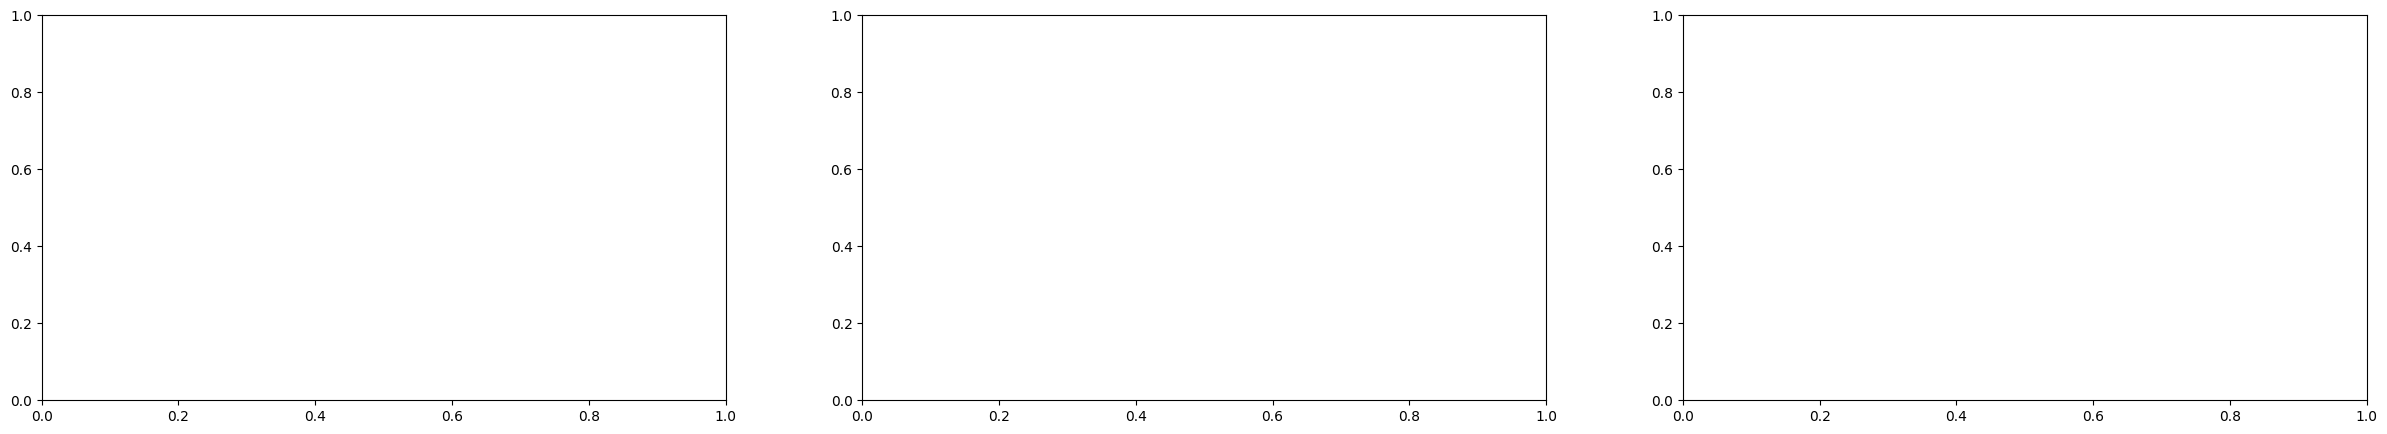

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(30, 5))
ax = ax.ravel()
metrics = ['Dice Coefficient', 'Loss', 'Learning Rate']

for i, met in enumerate(['dice_coef', 'loss', 'lr']): 
    if met != 'lr':
        ax[i].plot(history.history[met], 'o-')
        ax[i].plot(history.history['val_' + met], 'o-')
        ax[i].set_title('{} vs Epochs'.format(metrics[i]), fontsize=16)
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel(metrics[i])
        ax[i].set_xticks(np.arange(0,21,2))
        ax[i].legend(['Train', 'Validation'])
        ax[i].xaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
        ax[i].yaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
    else:
        ax[i].plot(history.history[met], 'o-')
        ax[i].set_title('{} vs Epochs'.format(metrics[i]), fontsize=16)
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel(metrics[i])
        ax[i].set_xticks(np.arange(0,21,2))
        ax[i].xaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
        ax[i].yaxis.grid(True, color = "lightgray", linewidth = "0.8", linestyle = "-")
        
plt.savefig('model_metrics_plot.png', facecolor= 'w',transparent= False, bbox_inches= 'tight', dpi= 150)

In [21]:
vgg16_unet.load_weights("./vgg16_unet_model_uavid.h5")

Found 4 images belonging to 1 classes.
Found 70 images belonging to 1 classes.
1/1 [==============================] - 1s 1s/step


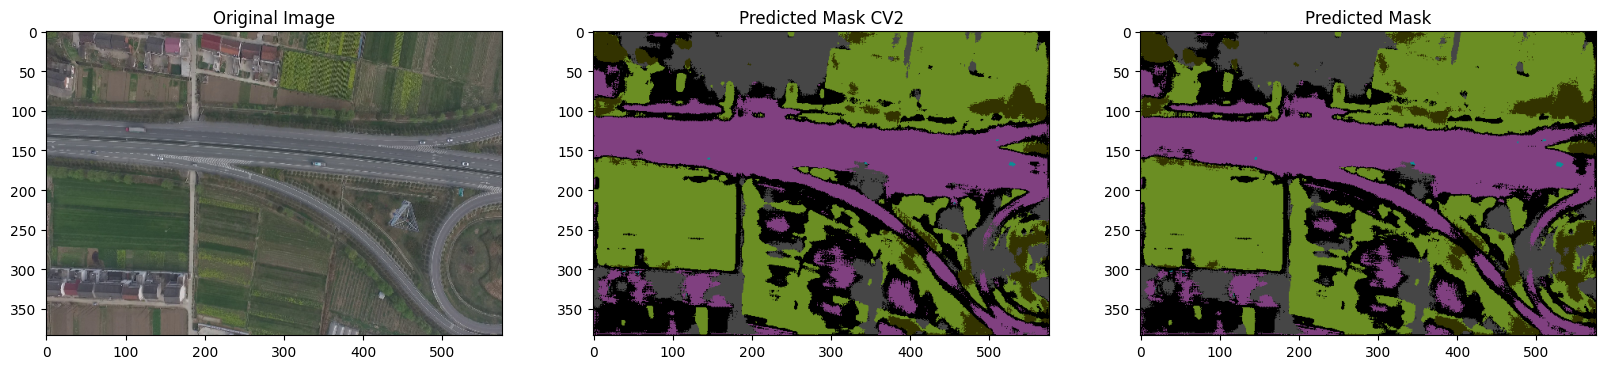

1/1 [==============================] - 0s 16ms/step


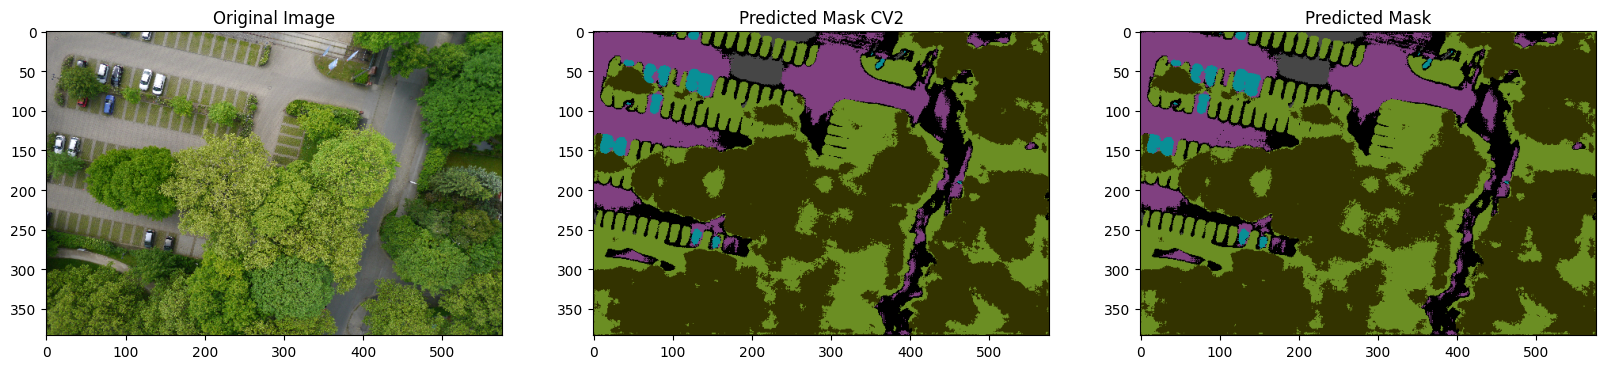

1/1 [==============================] - 0s 16ms/step


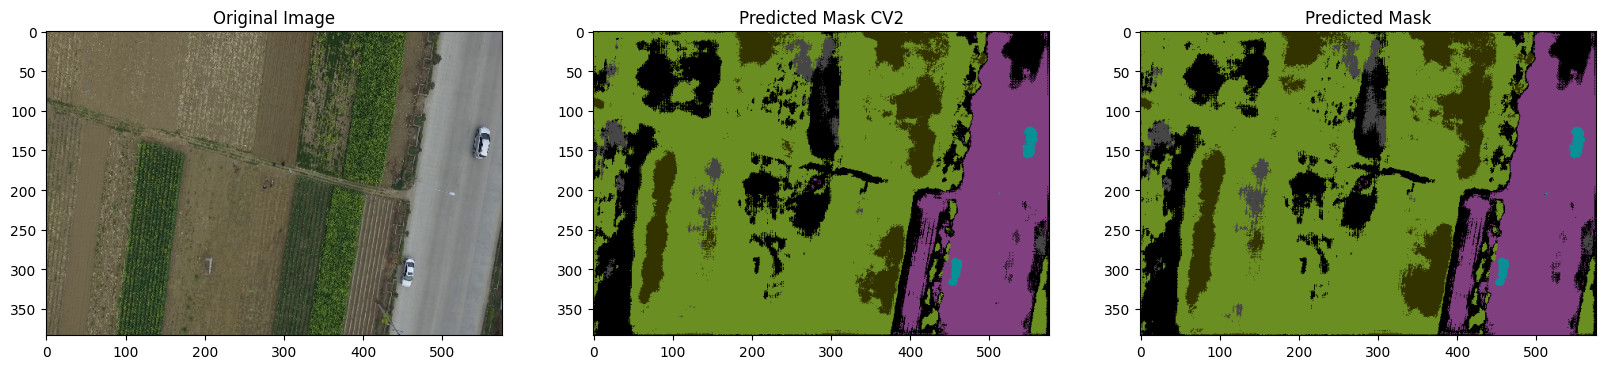

1/1 [==============================] - 0s 22ms/step


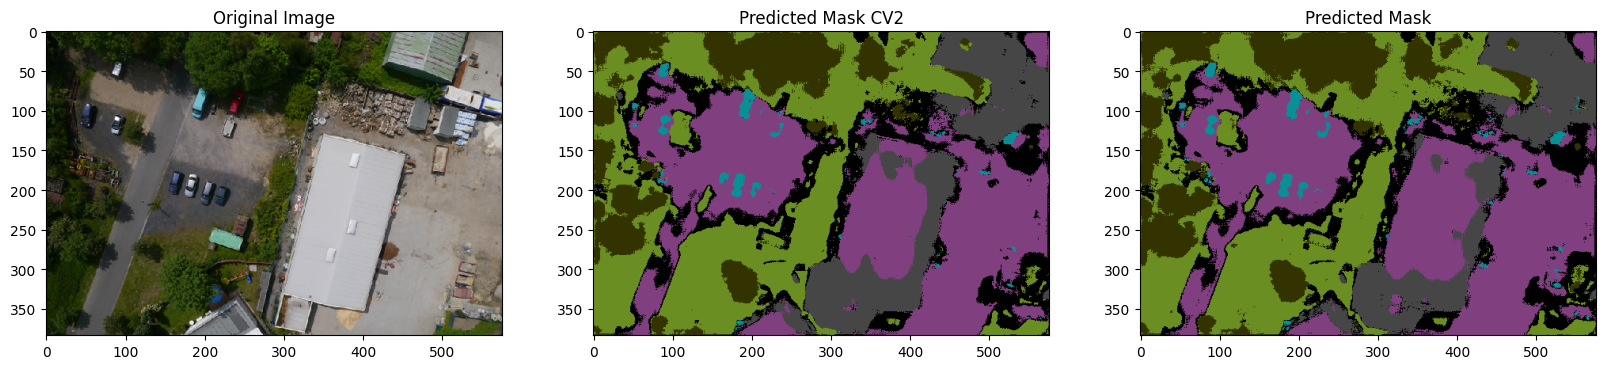

In [22]:
demo_gen = ValAugmentGenerator(val_images_dir = './augmented-semantic-drone-dataset/demo_img/', val_masks_dir = val_masks, target_size = shape_size)
batch_img,batch_mask = next(demo_gen)
pred_all= vgg16_unet.predict(batch_img)

demo_dir = '/augmented-semantic-drone-dataset/demo_img/demo/'
demo_img_names = ["demo_img2.jpg","demo_img.jpg", "demo_img3.jpg", "demo_img4.jpg"]

for j in range(0,np.shape(pred_all)[0]):
    fig = plt.figure(figsize=(20,8))


    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(batch_img[j])
    ax1.title.set_text('Original Image')
    ax1.grid(False)
    
    inference_img = cv2.imread(drive_root + demo_dir + demo_img_names[-j-1])
    inference_img = cv2.cvtColor(inference_img,cv2.COLOR_BGR2RGB)
    inference_img = cv2.resize(inference_img, (width, height))
    inference_img = inference_img[np.newaxis,...]*1/255

    pred = vgg16_unet.predict(inference_img)
    
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(onehot_to_rgb(pred[0],id2code))
    ax2.title.set_text('Predicted Mask CV2')
    # ax2.imshow(-(demo_img[0]*1/255-batch_img[j]))
    # ax2.title.set_text('Original Image cv2 - Generator Image')
    ax2.grid(False)


    ax3 = fig.add_subplot(1,3,3)
    ax3.set_title('Predicted Mask')
    ax3.imshow(onehot_to_rgb(pred_all[j],id2code))
    ax3.grid(False)
    plt.show()


(1, 384, 576, 3)
1/1 [==============================] - 0s 14ms/step


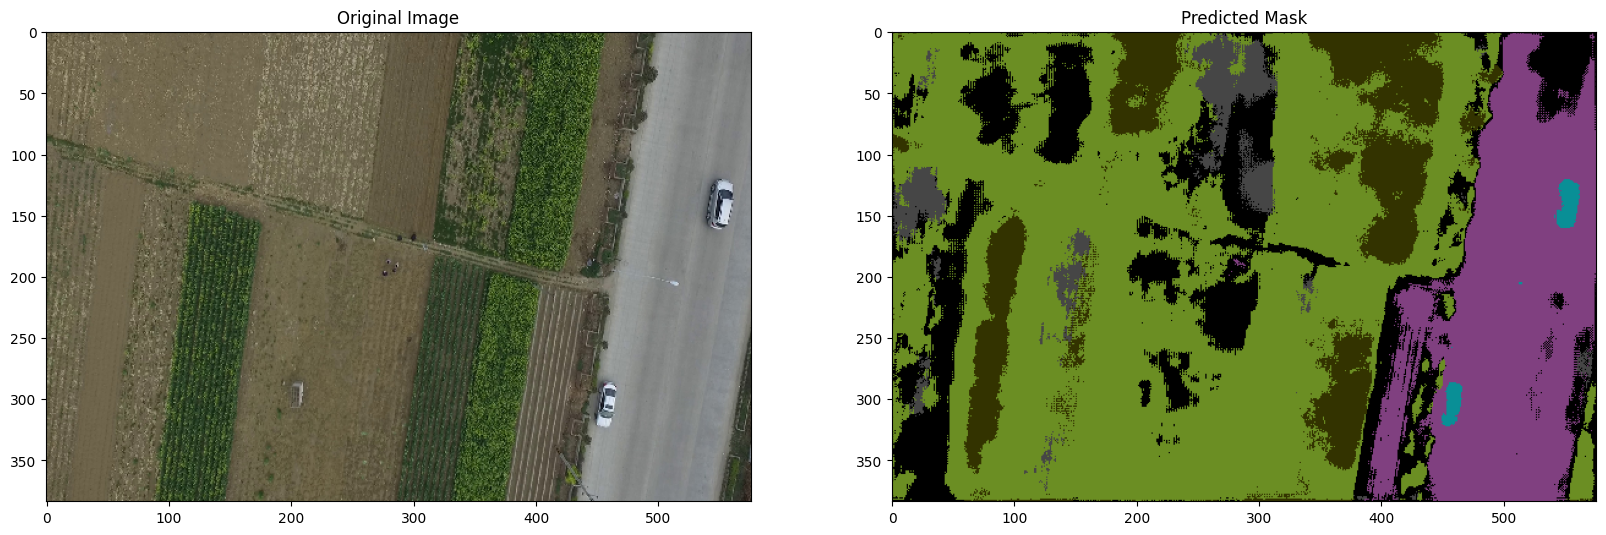

(1, 384, 576, 3)
1/1 [==============================] - 0s 21ms/step


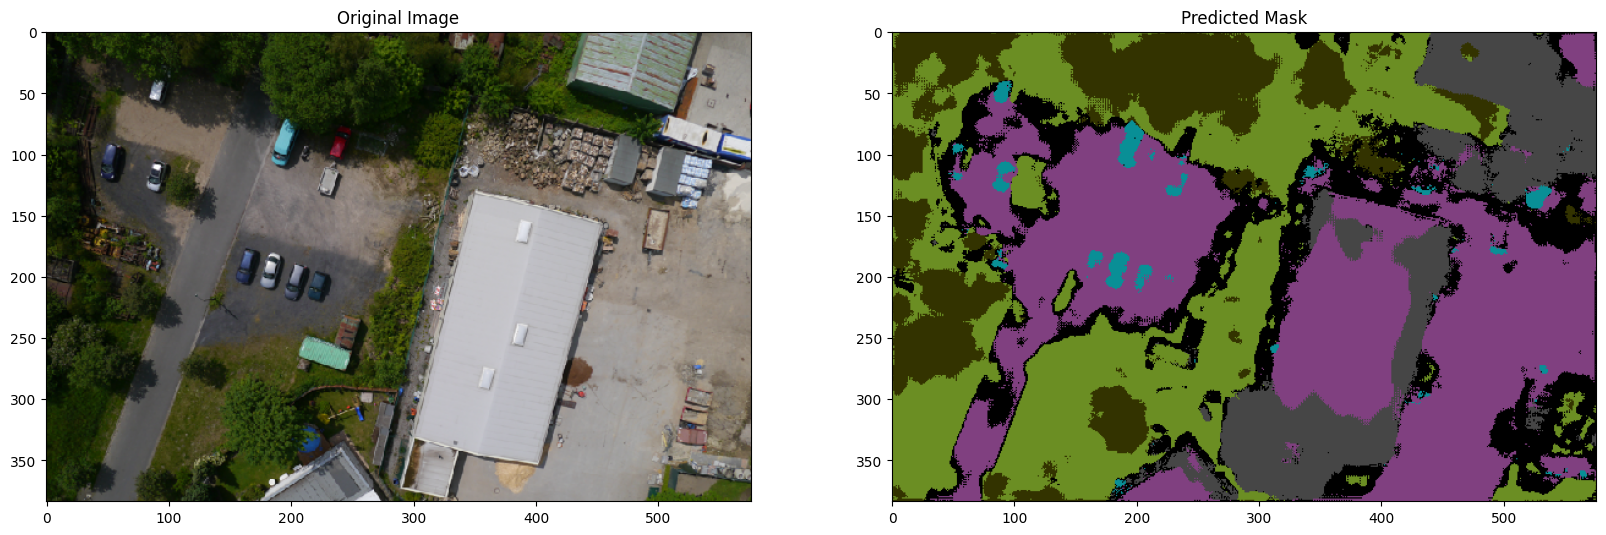

(1, 384, 576, 3)
1/1 [==============================] - 0s 18ms/step


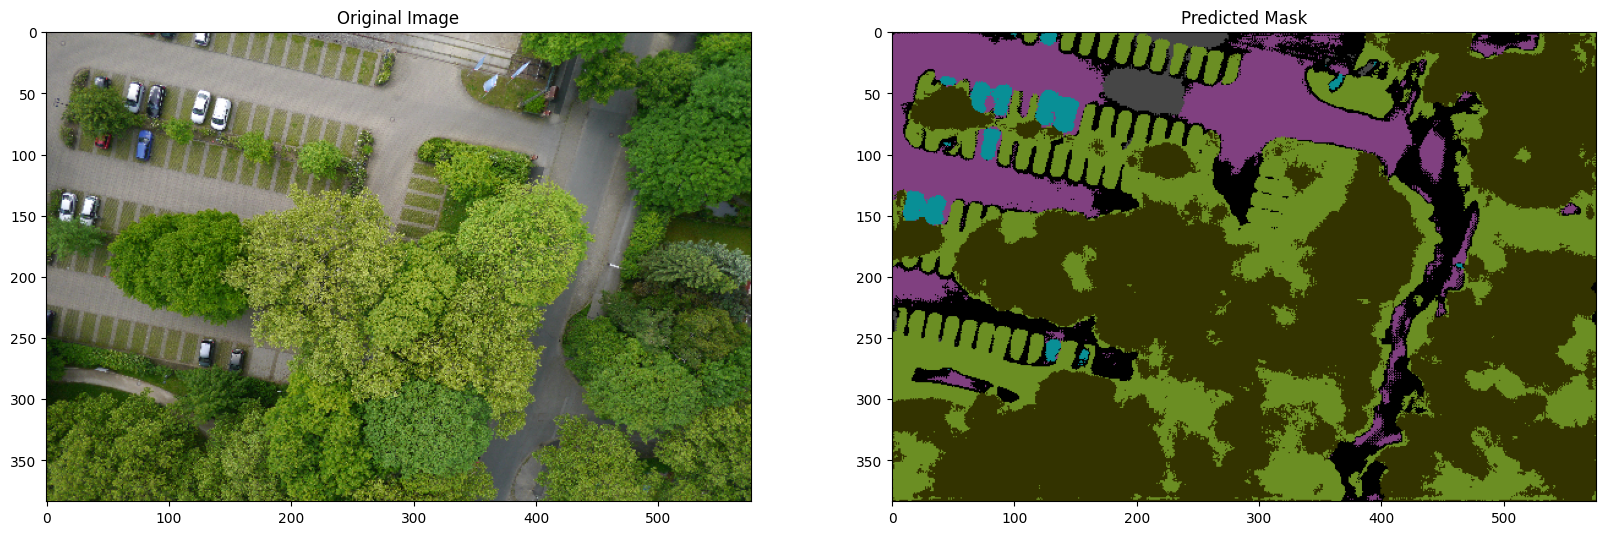

(1, 384, 576, 3)
1/1 [==============================] - 0s 18ms/step


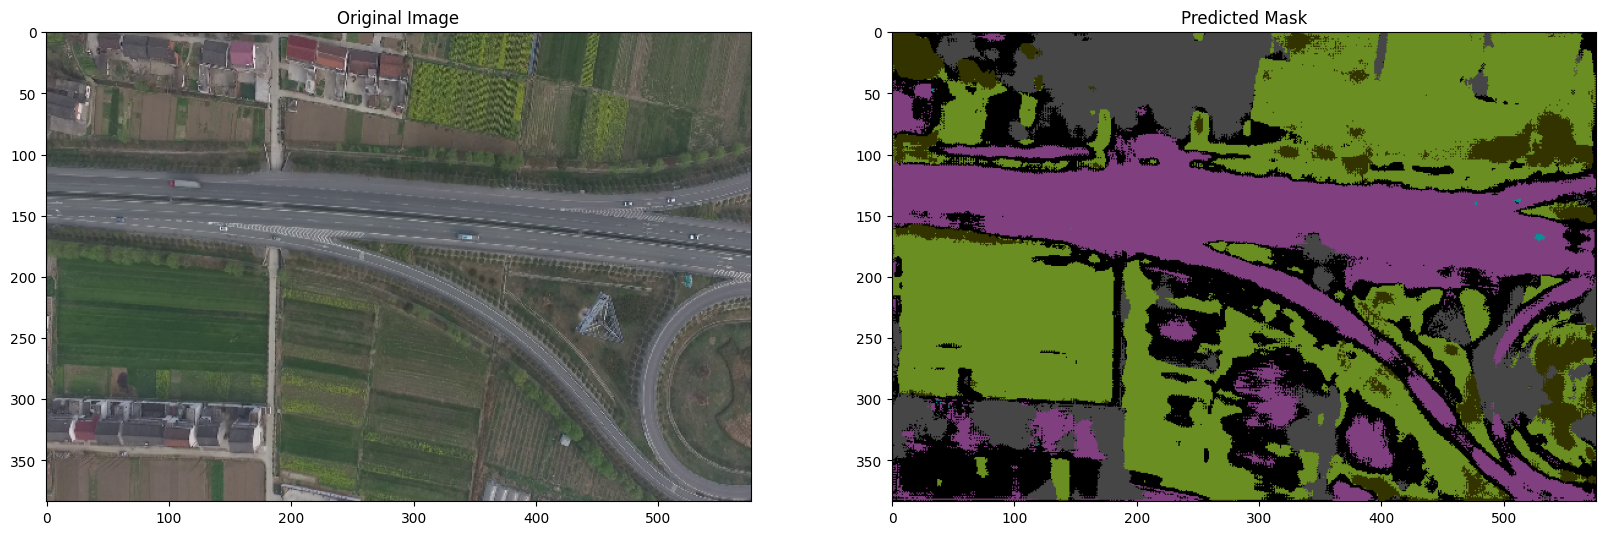

In [23]:
demo_dir = '/augmented-semantic-drone-dataset/demo_img/demo/'
demo_img_names = ["demo_img.jpg", "demo_img2.jpg", "demo_img3.jpg", "demo_img4.jpg"]
for demo_img_name in demo_img_names:
    inference_img = cv2.imread(drive_root + demo_dir + demo_img_name)
    inference_img = cv2.cvtColor(inference_img,cv2.COLOR_BGR2RGB)
    inference_img = cv2.resize(inference_img, (width, height), interpolation = cv2.INTER_NEAREST)
    inference_img = inference_img[np.newaxis,...]*1./255
    print(inference_img.shape)
    pred = vgg16_unet.predict(inference_img)
    np.shape(pred)


    fig = plt.figure(figsize=(20,8))

    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(inference_img[0])
    ax1.title.set_text('Original Image')
    ax1.grid(False)


    ax3 = fig.add_subplot(1,2,2)
    ax3.set_title('Predicted Mask')
    ax3.imshow(onehot_to_rgb(pred[0],id2code))
    ax3.grid(False)

    plt.show()

In [26]:
# pred_datasets_dir = './data-map2dfusion/data'
pred_datasets_dir = os.path.expanduser('~') + '/data/3d_vision/'
pred_dataset = 'phantom3-factory-kfs'
pred_images_dir = os.path.join(pred_datasets_dir, pred_dataset, 'rgb')
for img in os.listdir(pred_images_dir):
    inference_img = cv2.imread(os.path.join(pred_images_dir, img))
    inference_img = cv2.cvtColor(inference_img,cv2.COLOR_BGR2RGB)
    original_height, original_width, _ = inference_img.shape
    inference_img = cv2.resize(inference_img, (width, height), interpolation = cv2.INTER_NEAREST)
    inference_img = inference_img[np.newaxis,...]*1./255
    pred = vgg16_unet.predict(inference_img)
    segmented_img = onehot_to_rgb(pred[0],id2code)
    # save to inference folder
    segmentation_dir = os.path.join(pred_datasets_dir, pred_dataset, 'sem')
    if not os.path.exists(segmentation_dir):
        os.makedirs(segmentation_dir)
    segmented_img = cv2.cvtColor(segmented_img,cv2.COLOR_RGB2BGR)
    resized_segmented_img = cv2.resize(segmented_img, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    cv2.imwrite(os.path.join(segmentation_dir, img), resized_segmented_img)

    # fig = plt.figure(figsize=(20,8))

    # ax1 = fig.add_subplot(1,2,1)
    # ax1.imshow(inference_img[0])
    # ax1.title.set_text('Original Image')
    # ax1.grid(False)


    # ax3 = fig.add_subplot(1,2,2)
    # ax3.set_title('Predicted Mask')
    # ax3.imshow(onehot_to_rgb(pred[0],id2code))
    # ax3.grid(False)

    # plt.show()

1/1 [==============================] - 0s 17ms/step


In [ ]:

testing_images = './data-map2dfusion/data/phantom3-factory-kfs'
testing_masks = f'./augmented-{dataset}-dataset/val_masks/' 
                
testing_gen = ValAugmentGenerator(val_images_dir = testing_images, val_masks_dir = testing_masks, target_size = shape_size,batch_size=5)


In [ ]:
count = 0
for i in range(1):
    batch_img,batch_mask = next(testing_gen)
    pred_all= vgg16_unet.predict(batch_img)
    np.shape(pred_all)
    
    for j in range(0,np.shape(pred_all)[0]):
        count += 1
        fig = plt.figure(figsize=(20,8))

        ax1 = fig.add_subplot(1,3,1)
        ax1.imshow(batch_img[j])
        ax1.title.set_text('Original Image')
        ax1.grid(False)

        ax2 = fig.add_subplot(1,3,2)
        ax2.set_title('Ground Truth Mask')
        ax2.imshow(onehot_to_rgb(batch_mask[j],id2code))
        ax2.grid(False)

        ax3 = fig.add_subplot(1,3,3)
        ax3.set_title('Predicted Mask')
        ax3.imshow(onehot_to_rgb(pred_all[j],id2code))
        ax3.grid(False)

        plt.savefig('./predictions/prediction_{}.png'.format(count), facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 200)
        plt.show()

In [ ]:
!zip -r predictions.zip './predictions/'